In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# train_data1 = pd.read_csv("D:\\Personal\\Msc\\Y1S1\\Advanced Data Mining\\GroupAssignment\\web-traffic-time-series-forecasting\\TrainingData\\train_1.csv").fillna(0)
train_data2 = pd.read_csv("D:\\Personal\\Msc\\Y1S1\\Advanced Data Mining\\GroupAssignment\\web-traffic-time-series-forecasting\\TrainingData\\train_2.csv").fillna(0)

In [3]:
train_data2.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


In [4]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 804 entries, Page to 2017-09-10
dtypes: float64(803), object(1)
memory usage: 889.8+ MB


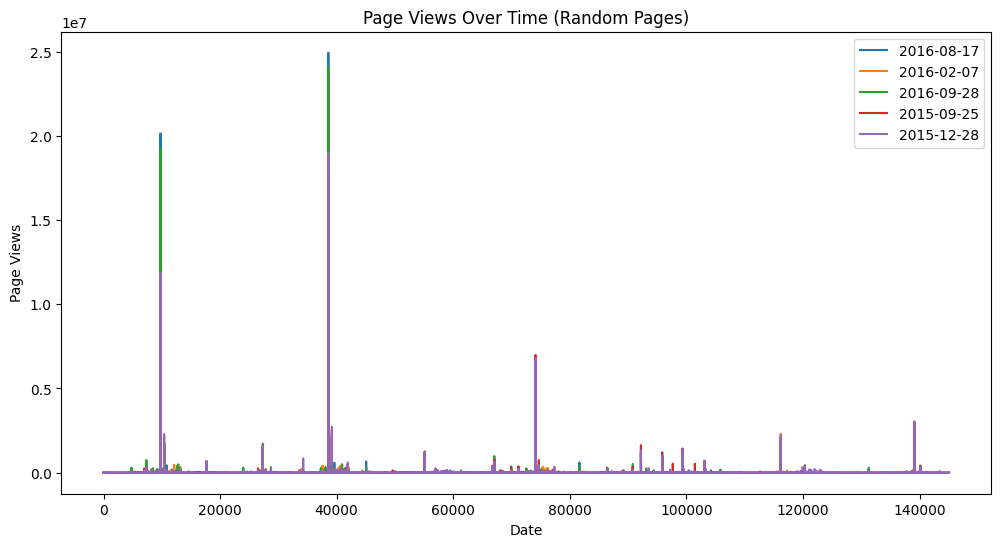

In [5]:
# Visualize the time series data for a few random pages
random_pages = np.random.choice(train_data2.columns[1:], 5, replace=False)  # choose 5 random pages
plt.figure(figsize=(12, 6))
for page in random_pages:
    plt.plot(train_data2[page], label=page)
plt.title('Page Views Over Time (Random Pages)')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.legend()
plt.show()

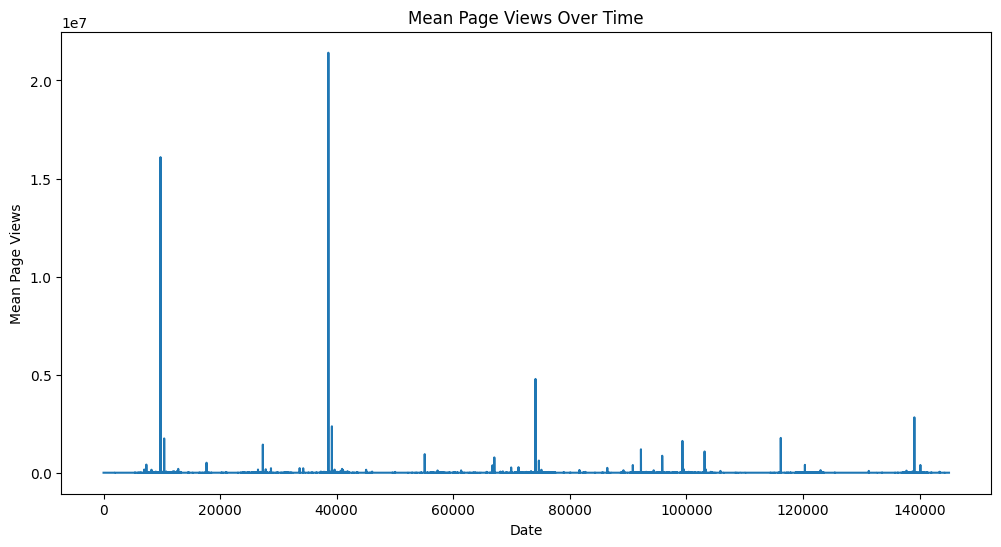

In [6]:
import seaborn as sns

# Check for trends and seasonality
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data2.iloc[:, 1:].mean(axis=1))
plt.title('Mean Page Views Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Page Views')
plt.show()

Get the language of a given page

In [7]:
import re # to separate pages based on language (regular expression)

def find_language(url):
    res = re.search('[a-z][a-z].wikipedia.org',url)
    if res:
        return res[0][0:2]
    return 'na'

train_data2['lang'] = train_data2.Page.map(find_language)

Separate all the pages based on their language and average them up to find views per page per language

In [8]:
lang_sets = {}
lang_sets['en'] = train_data2[train_data2.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = train_data2[train_data2.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train_data2[train_data2.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train_data2[train_data2.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train_data2[train_data2.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train_data2[train_data2.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train_data2[train_data2.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train_data2[train_data2.lang=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

Plots of average number of views for all different languages per day

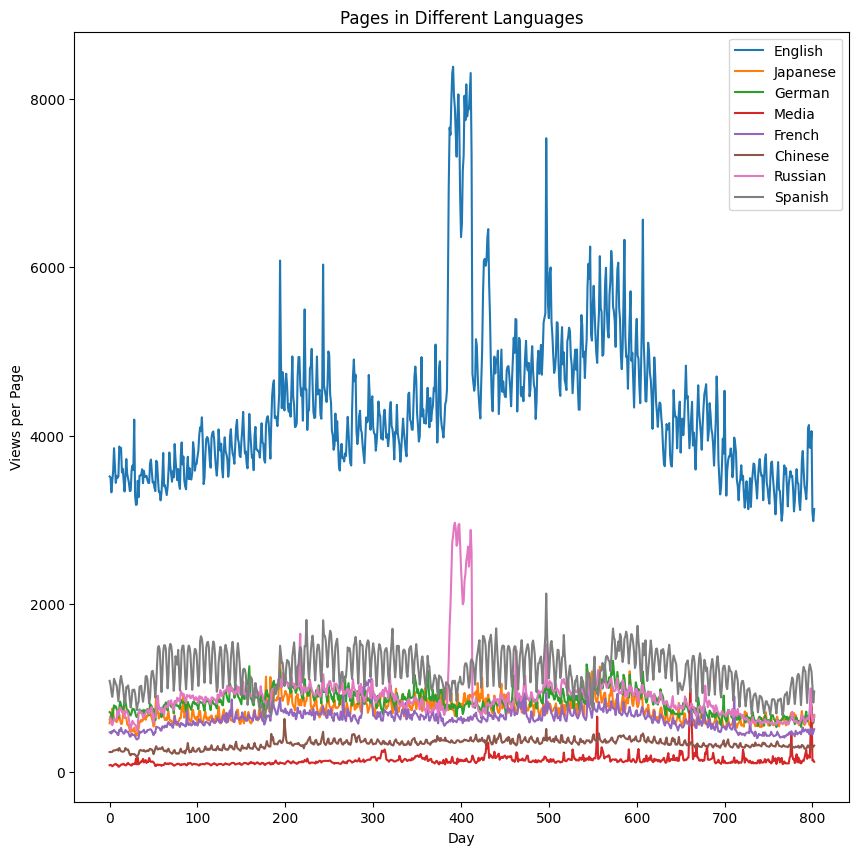

In [9]:
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )
    
plt.legend()
plt.show()

Plot Autocorrelation and Partial Autocorrelation graphs for all these languages, to estimate the hyperparameters used in training the ARIMA model.

en


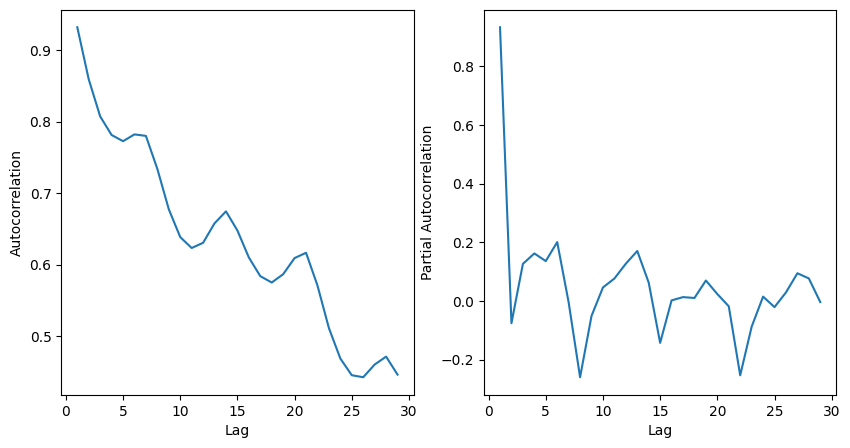

ja


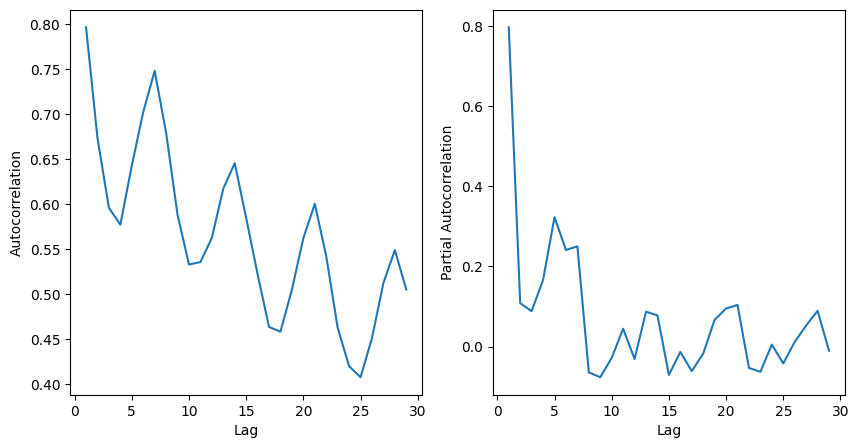

de


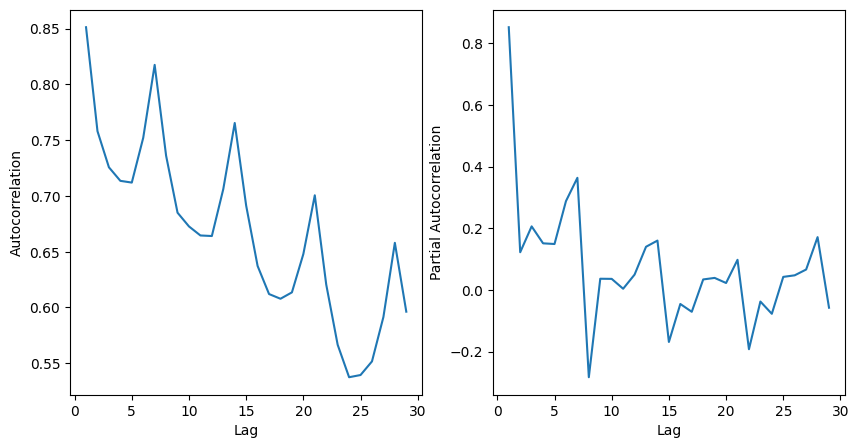

na


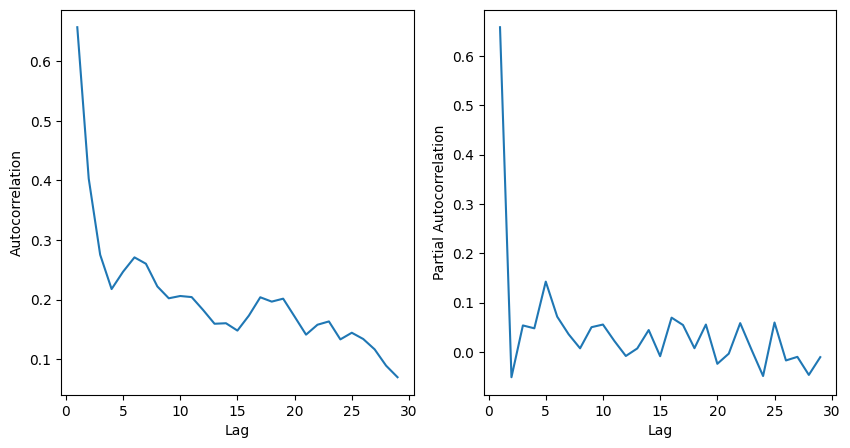

fr


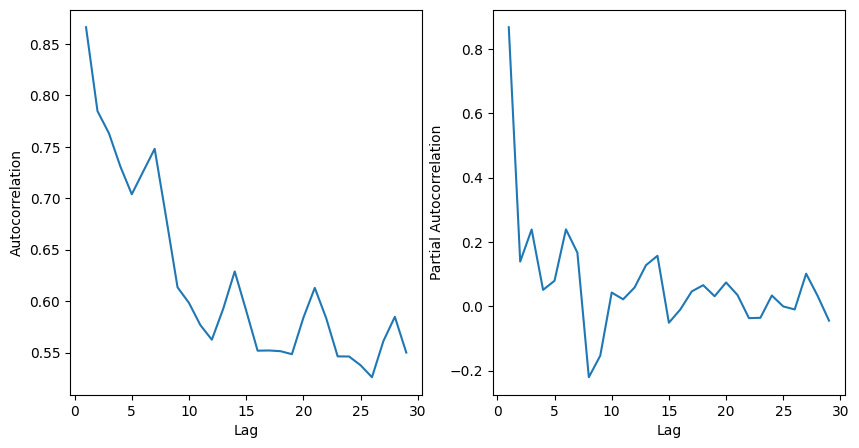

zh


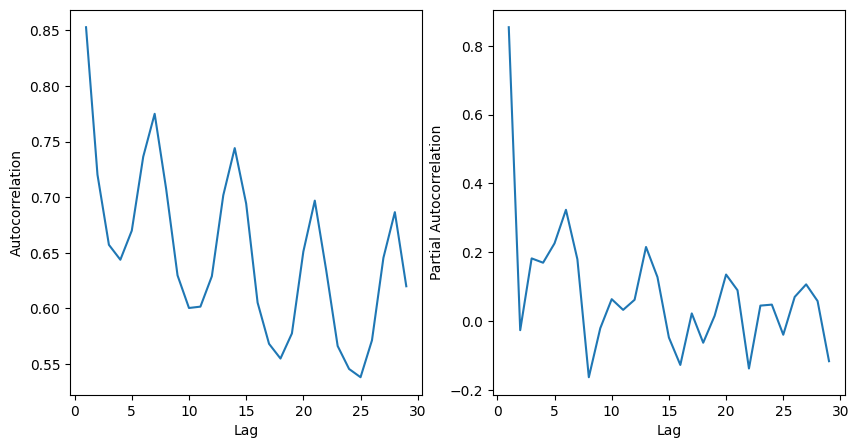

ru


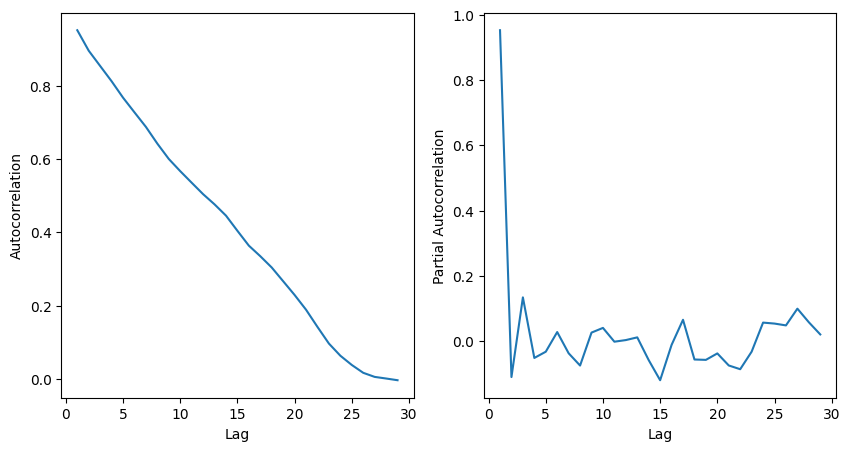

es


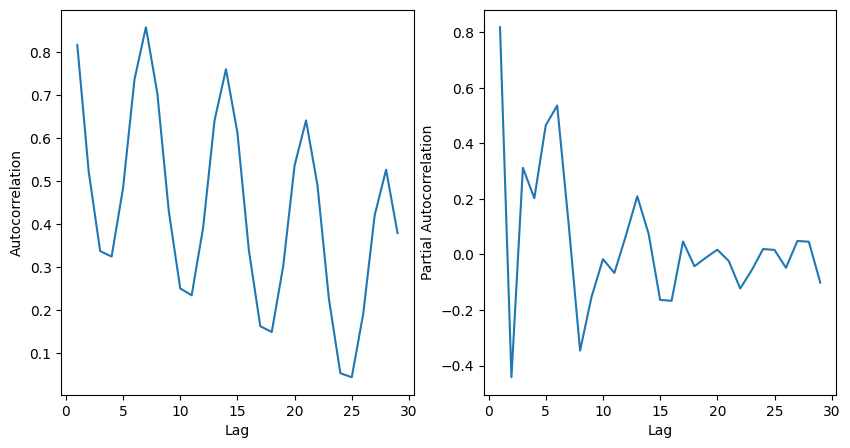

In [10]:
from statsmodels.tsa.arima_model import ARIMA # to make an ARIMA model that fits the data
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

for key in sums:
    fig = plt.figure(1,figsize=[10,5])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    data = np.array(sums[key])
    autocorr = acf(data)
    pac = pacf(data)

    x = [x for x in range(len(pac))]
    ax1.plot(x[1:],autocorr[1:])

    ax2.plot(x[1:],pac[1:])
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Autocorrelation')

    ax2.set_xlabel('Lag')
    ax2.set_ylabel('Partial Autocorrelation')
    print(key)
    plt.show()

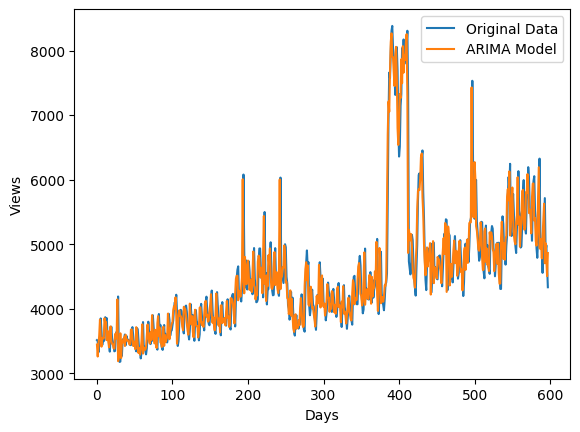

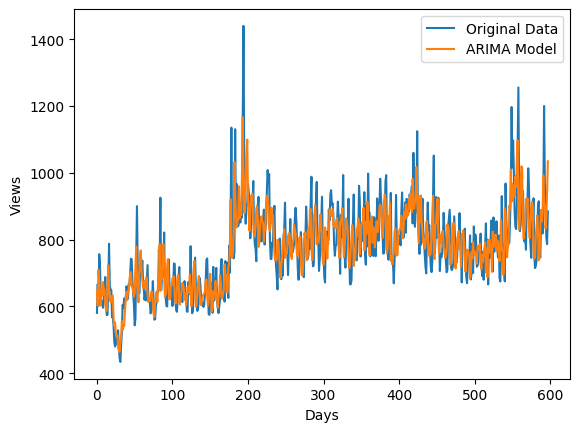

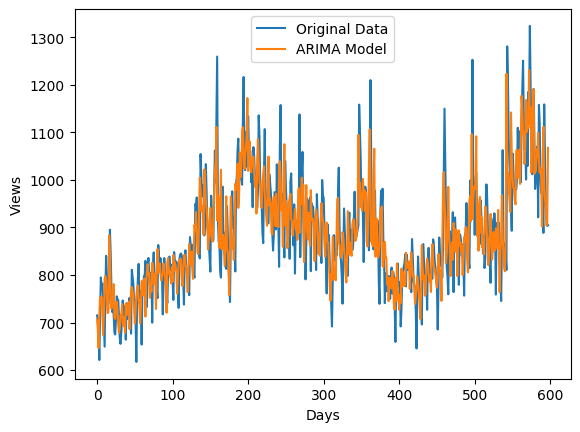

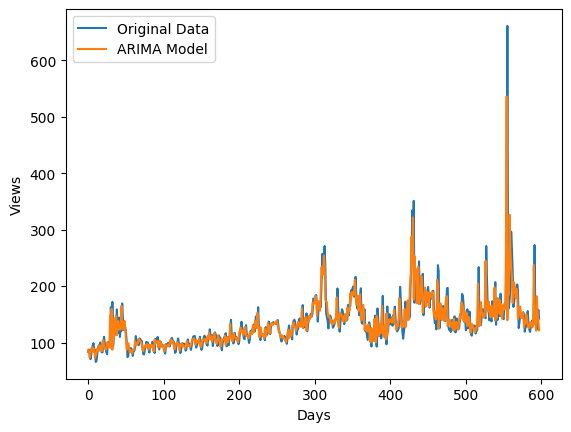

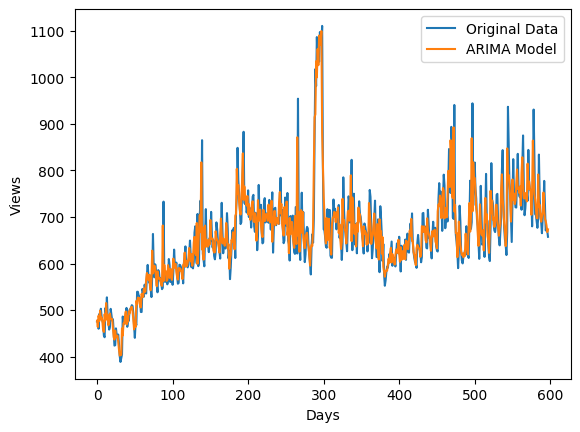

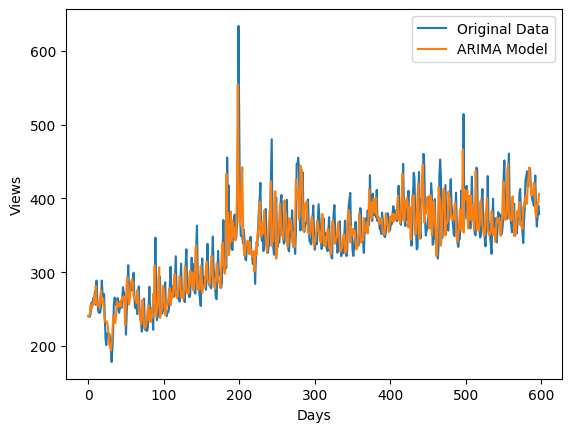

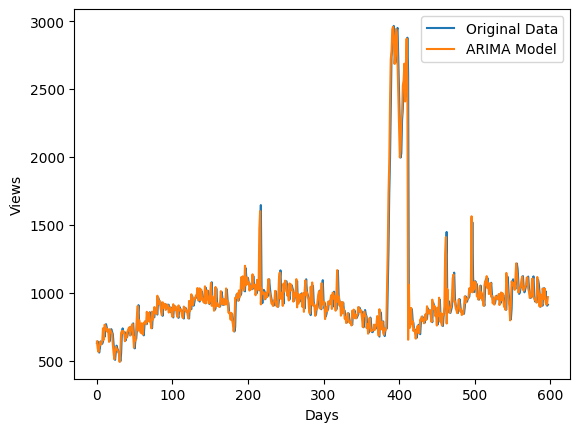

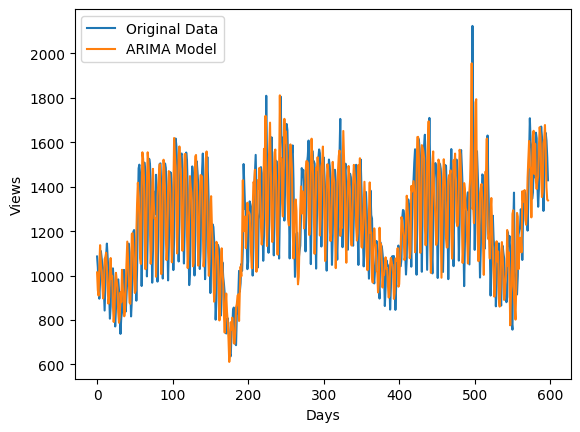

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

params = {'en': [4, 1, 0], 'ja': [7, 1, 1], 'de': [7, 1, 1], 'na': [4, 1, 0], 'fr': [4, 1, 0], 'zh': [7, 1, 1], 'ru': [4, 1, 0], 'es': [7, 1, 1]}

for key in sums:
    data = np.array(sums[key])
    arima = ARIMA(data, order=params[key])
    result = arima.fit()
    pred = result.predict(start=2, end=599, type='levels')
    x = [i for i in range(600)]
    
    # plt.plot(x[2:len(data)], data, label='Data')
    # plt.plot(x[2:], pred, label='ARIMA Model')
    # plt.xlabel('Days')
    # plt.ylabel('Views')
    # plt.legend()
    # plt.show()

    min_length = min(len(data), len(pred))
    data = data[:min_length]
    pred = pred[:min_length]

    # Plot original data and ARIMA model predictions
    plt.plot(data, label='Original Data')
    plt.plot(pred, label='ARIMA Model')

    # Other plotting configurations (labels, legend, etc.)
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.legend()
    plt.show()

In [12]:
def smape(y_true, y_pred):
    """
    Calculate Symmetric Mean Absolute Percentage Error (SMAPE)
    """
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

# Assuming data and pred are numpy arrays
smape_value = smape(data, pred)
print("SMAPE:", smape_value)

SMAPE: 15.055241229275715


Use the predictions of these models as one of the inputs to our ensemble model

Create another LSTM model for ensemble

In [13]:
train_data2.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,lang
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0,zh


Training LSTM models for top pages of all the languages as a demo

In [14]:
train_data2 = train_data2.drop('Page',axis = 1)
train_data2.shape

(145063, 804)

In [15]:
#Packages for pre processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

 # Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

8/8 [==============================] - 0s 2ms/step
SMAPE for en: 19.36%


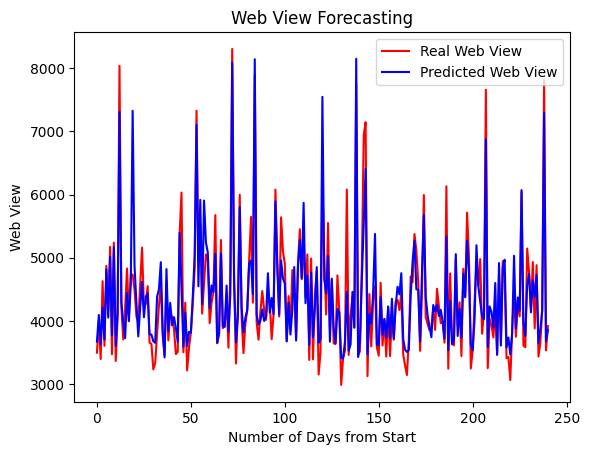

8/8 [==============================] - 0s 0s/step
SMAPE for ja: 18.95%


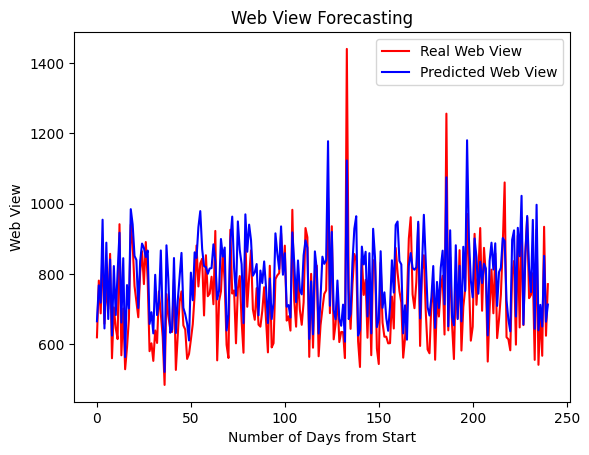

8/8 [==============================] - 0s 2ms/step
SMAPE for de: 18.06%


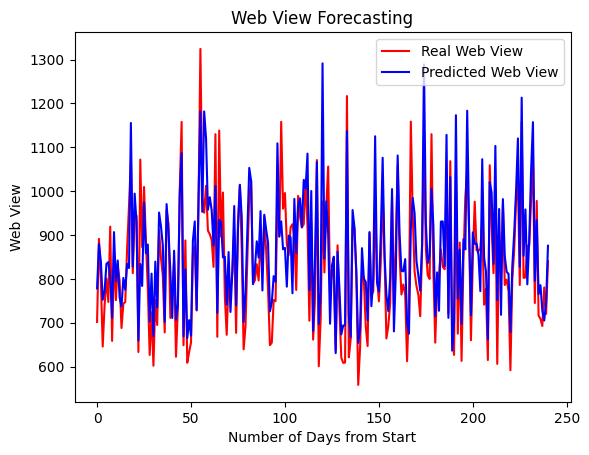

8/8 [==============================] - 0s 2ms/step
SMAPE for na: 25.12%


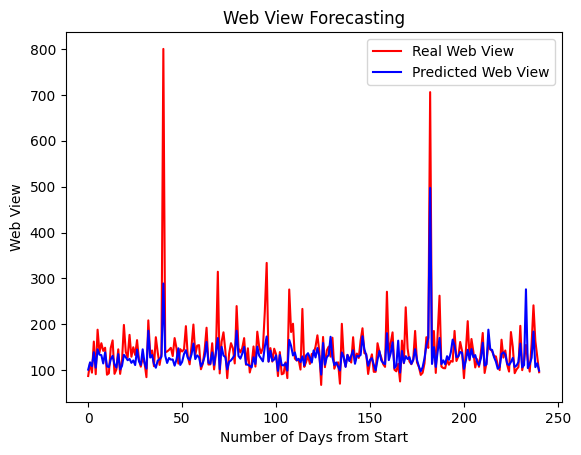

8/8 [==============================] - 0s 2ms/step
SMAPE for fr: 18.63%


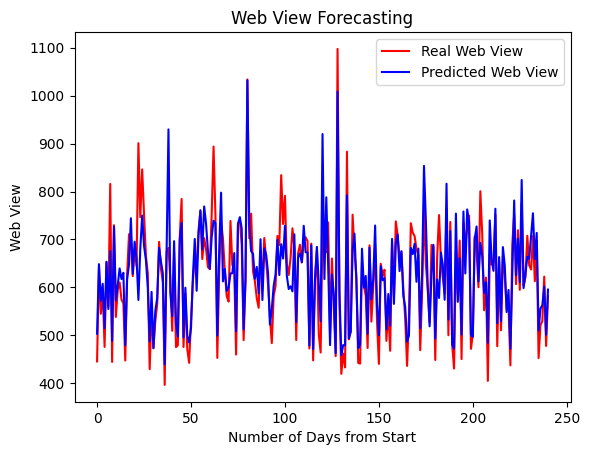

8/8 [==============================] - 0s 0s/step
SMAPE for zh: 12.78%


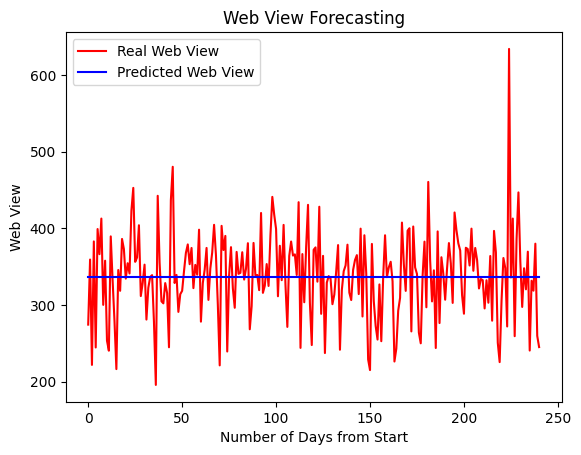

8/8 [==============================] - 0s 0s/step
SMAPE for ru: 24.78%


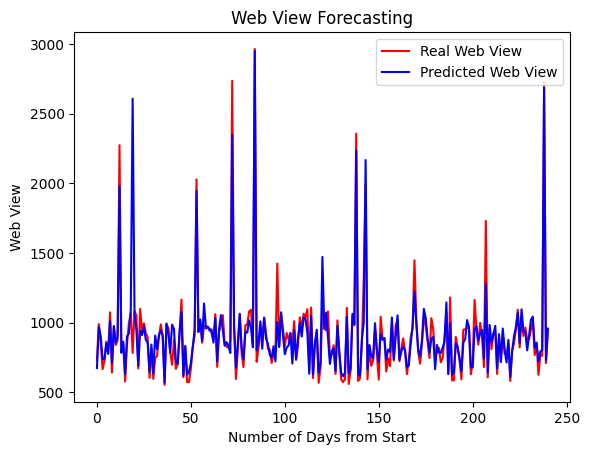

8/8 [==============================] - 0s 0s/step
SMAPE for es: 21.81%


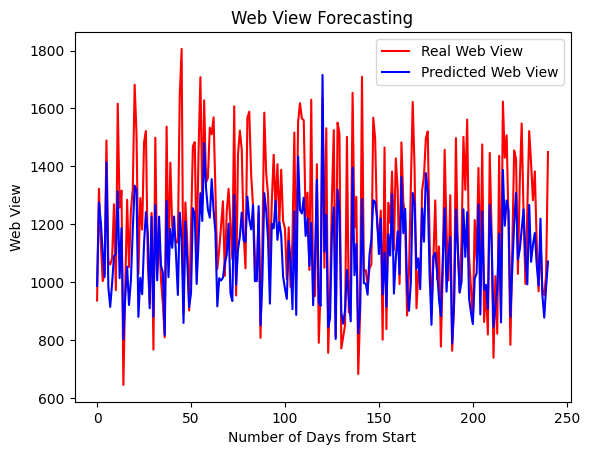

In [16]:
# Iterate over the data
for key in sums:
    row = [0] * sums[key].shape[0]
    for i in range(sums[key].shape[0]):
        row[i] = sums[key][i]

    # Using Data From Random Row for Training and Testing
    X = row[0:802]
    y = row[1:803]

    # Convert lists to NumPy arrays
    X = np.array(X)
    y = np.array(y)

    # Reshape X for LSTM input
    X = X.reshape(-1, 1)

    # Split the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Feature Scaling
    sc = MinMaxScaler()
    X_train_scaled = sc.fit_transform(X_train)
    y_train_reshaped = y_train.reshape(-1, 1)
    y_train_scaled = sc.fit_transform(y_train_reshaped)
    y_train_scaled = y_train_scaled.reshape(-1)

    # Reshape X_train for LSTM input
    X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))

    # Initialising the RNN
    regressor = Sequential()

    # Adding the input layer and the LSTM layer
    regressor.add(LSTM(units=8, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))

    # Adding the output layer
    regressor.add(Dense(units=1))

    # Compiling the RNN
    regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

    # Fitting the RNN to the Training set
    regressor.fit(X_train_scaled, y_train_scaled, batch_size=10, epochs=100, verbose=0)

    # Getting the predicted Web View
    inputs = sc.transform(X_test)
    inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
    y_pred_scaled = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred_scaled)

    # Calculate SMAPE
    smape_value = smape(y_test, y_pred)
    print(f'SMAPE for {key}: {smape_value:.2f}%')

    # Visualising Result
    plt.plot(y_test, color='red', label='Real Web View')
    plt.plot(y_pred, color='blue', label='Predicted Web View')
    plt.title('Web View Forecasting')
    plt.xlabel('Number of Days from Start')
    plt.ylabel('Web View')
    plt.legend()
    plt.show()


Create an ensemble of LSTM and ARIMA

8/8 [==============================] - 0s 2ms/step
Ensemble SMAPE for en: 10.05%


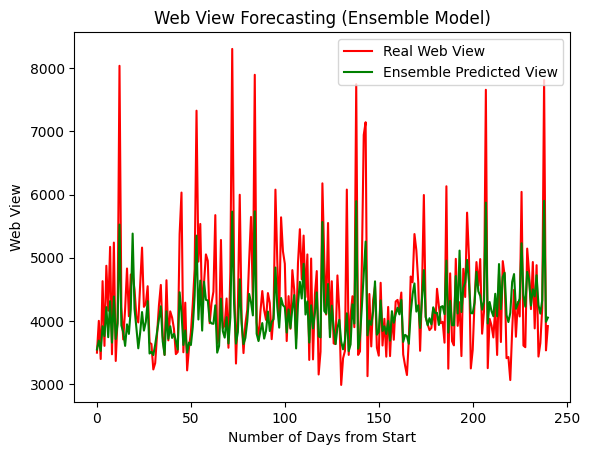

8/8 [==============================] - 0s 2ms/step
Ensemble SMAPE for ja: 10.74%


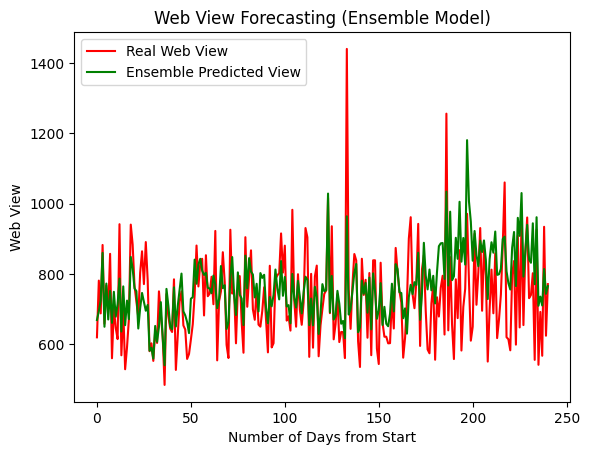

8/8 [==============================] - 0s 1ms/step
Ensemble SMAPE for de: 10.33%


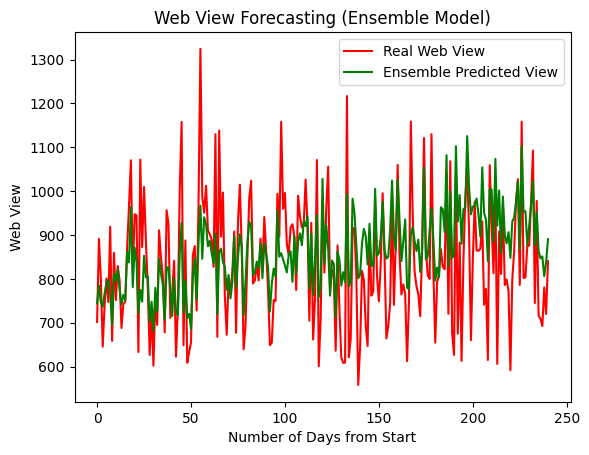

8/8 [==============================] - 0s 2ms/step
Ensemble SMAPE for na: 20.79%


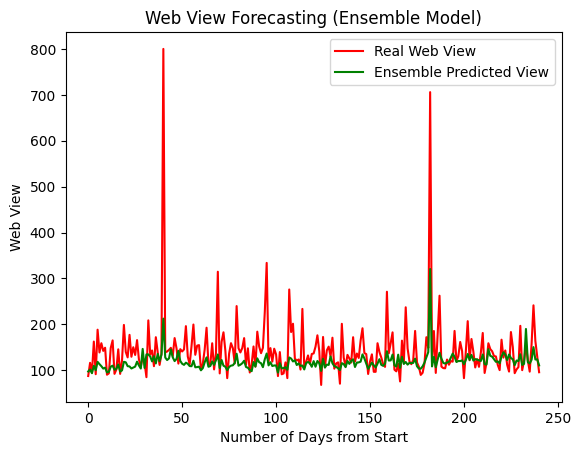

8/8 [==============================] - 0s 2ms/step
Ensemble SMAPE for fr: 11.10%


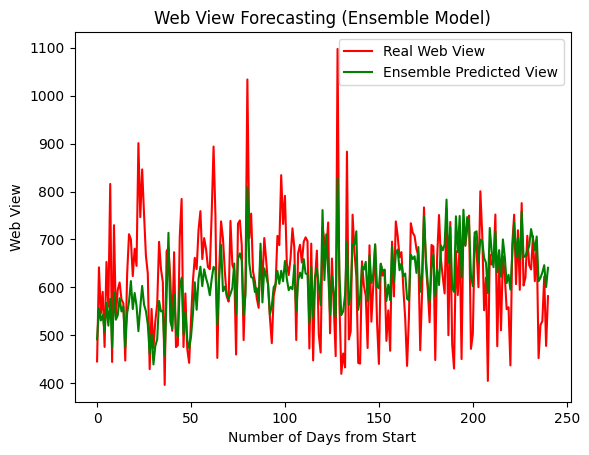

8/8 [==============================] - 0s 2ms/step
Ensemble SMAPE for zh: 9.52%


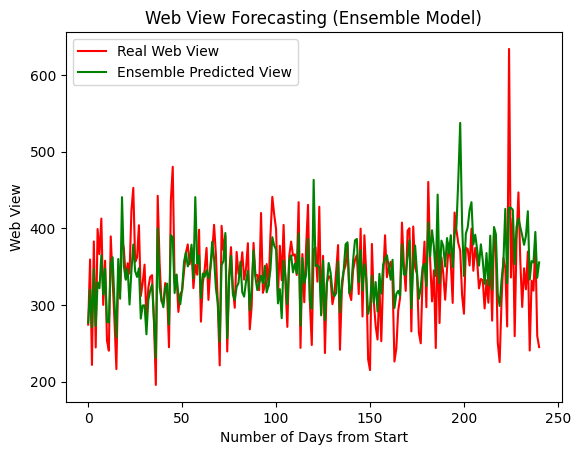

8/8 [==============================] - 0s 1ms/step
Ensemble SMAPE for ru: 13.45%


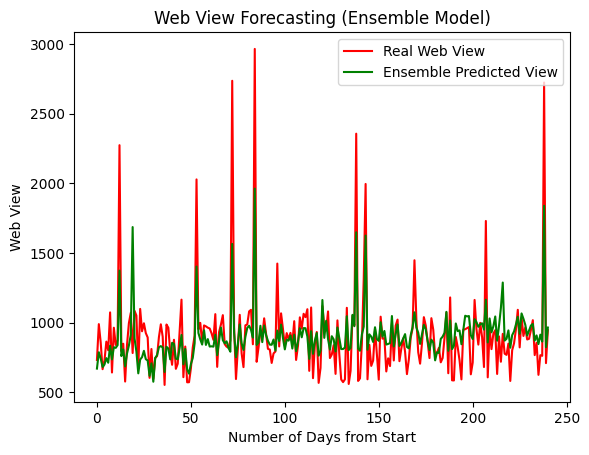

8/8 [==============================] - 0s 3ms/step
Ensemble SMAPE for es: 16.19%


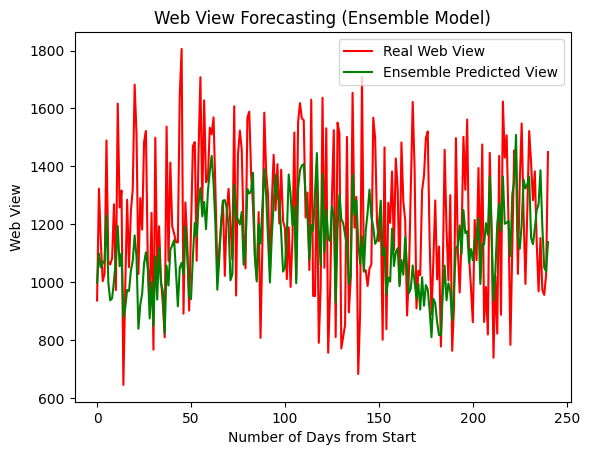

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define SMAPE function
def smape(y_true, y_pred):
    """
    Calculate Symmetric Mean Absolute Percentage Error (SMAPE)
    """
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

# ARIMA parameters for each key
params = {'en': [4, 1, 0], 'ja': [7, 1, 1], 'de': [7, 1, 1], 'na': [4, 1, 0], 'fr': [4, 1, 0], 'zh': [7, 1, 1], 'ru': [4, 1, 0], 'es': [7, 1, 1]}

# Iterate over the data
for key in sums:
    # ARIMA model
    data = np.array(sums[key])
    arima = ARIMA(data, order=params[key])
    result = arima.fit()
    pred = result.predict(start=2, end=599, type='levels')
    
    # LSTM model
    row = [0] * sums[key].shape[0]
    for i in range(sums[key].shape[0]):
        row[i] = sums[key][i]

    X = row[0:802]
    y = row[1:803]

    X = np.array(X)
    y = np.array(y)

    X = X.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    sc = MinMaxScaler()
    X_train_scaled = sc.fit_transform(X_train)
    y_train_reshaped = y_train.reshape(-1, 1)
    y_train_scaled = sc.fit_transform(y_train_reshaped)
    y_train_scaled = y_train_scaled.reshape(-1)

    X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))

    regressor = Sequential()
    regressor.add(LSTM(units=8, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
    regressor.fit(X_train_scaled, y_train_scaled, batch_size=10, epochs=100, verbose=0)

    inputs = sc.transform(X_test)
    inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
    y_pred_scaled = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred_scaled)

    # Ensemble predictions: averaging ARIMA and LSTM predictions
    min_length = min(len(pred), len(y_pred.flatten()))
    ensemble_pred = (pred[:min_length] + y_pred.flatten()[:min_length]) / 2

    # Calculate SMAPE for ensemble model
    ensemble_smape = smape(y_test, ensemble_pred)
    print(f'Ensemble SMAPE for {key}: {ensemble_smape:.2f}%')

    # Visualize results
    plt.plot(y_test, color='red', label='Real Web View')
    plt.plot(ensemble_pred, color='green', label='Ensemble Predicted View')
    plt.title('Web View Forecasting (Ensemble Model)')
    plt.xlabel('Number of Days from Start')
    plt.ylabel('Web View')
    plt.legend()
    plt.show()